# What's Cooking
Use recipe ingredients to categorize the cuisine

#### Import Libraries

In [1]:
import numpy as np # Linear algebra library for python

In [3]:
import pandas as pd # Data Analysis library for python

In [4]:
train = pd.read_json('train.json')

In [5]:
#Check the head of the dataset
train.head()

cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

In [6]:
train.shape

(39774, 3)

##### Calculating the number of missing values

In [7]:
train.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [8]:
train.dtypes

cuisine        object
id              int64
ingredients    object
dtype: object

In [9]:
train.loc[0,'cuisine']

'greek'

In [10]:
train.loc[0,'ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [11]:
type(train.loc[0,'ingredients'])

list

In [12]:
type(train.loc[0,'cuisine'])

str

In [13]:
train.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [14]:
train.ingredients.apply(len).head()

0     9
1    11
2    12
3     4
4    20
Name: ingredients, dtype: int64

In [15]:
train['num_ingredients'] = train.ingredients.apply(len)

In [16]:
train.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

   num_ingredients  
0                9  
1               11  
2               12  
3                4  
4               20

In [17]:
train.groupby('cuisine').num_ingredients.mean()

cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: num_ingredients, dtype: float64

In [18]:
train.groupby('cuisine').num_ingredients.describe()

count       mean       std  min  25%   50%   75%   max
cuisine                                                              
brazilian      467.0   9.520343  5.555139  2.0  5.0   9.0  13.0  59.0
british        804.0   9.708955  4.165011  2.0  7.0   9.0  12.0  30.0
cajun_creole  1546.0  12.617076  4.611601  2.0  9.0  12.0  16.0  31.0
chinese       2673.0  11.982791  4.042125  2.0  9.0  12.0  14.0  38.0
filipino       755.0  10.000000  3.855135  2.0  7.0  10.0  12.0  38.0
french        2646.0   9.817838  4.144744  1.0  7.0   9.0  12.0  31.0
greek         1175.0  10.182128  3.729461  1.0  7.0  10.0  12.0  27.0
indian        3003.0  12.705961  5.016806  1.0  9.0  12.0  16.0  49.0
irish          667.0   9.299850  3.700505  2.0  7.0   9.0  12.0  27.0
italian       7838.0   9.909033  3.806708  1.0  7.0  10.0  12.0  65.0
jamaican       526.0  12.214829  4.763897  2.0  9.0  12.0  15.0  35.0
japanese      1423.0   9.735067  4.245882  1.0  7.0   9.0  12.0  34.0
korean         830.0  11.284337  3.878880  2.0  9.0  11.0  14.0  29.0
mexican       6438.0  10.877446  4.660183  1.0  7.0  10.0  14.0  52.0
moroccan       821.0  12.909866  4.799813  2.0  9.0  13.0  16.0  31.0
russian        489.0  10.224949  4.051223  2.0  7.0  10.0  13.0  25.0
southern_us   4320.0   9.634954  3.869404  1.0  7.0   9.0  12.0  40.0
spanish        989.0  10.423660  4.160919  1.0  7.0  10.0  13.0  35.0
thai          1539.0  12.545809  4.411794  1.0  9.0  12.0  15.0  40.0
vietnamese     825.0  12.675152  5.256173  1.0  9.0  12.0  16.0  31.0

In [19]:
%matplotlib inline # to appear the plot inside the notebook

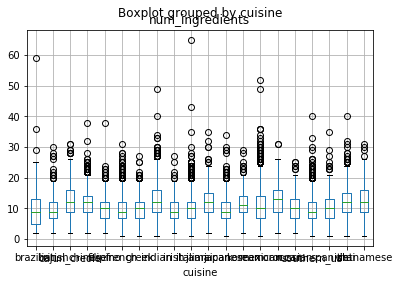

In [20]:
train.boxplot('num_ingredients', by='cuisine')

In [21]:
sample_recipe = train.loc[3,'ingredients']

In [22]:
sample_recipe

['water', 'vegetable oil', 'wheat', 'salt']

In [23]:
def mean_string_length(list_of_string):
    return np.mean([len(string) for string in list_of_string])


In [24]:
mean_string_length(sample_recipe)

6.75

#### Instead of user defined function use lamda function

In [25]:
#train.ingredients.apply(lambda x: np.mean([len(item) for item in x ]))

In [26]:
train['ingredients_length'] = train['ingredients'].apply(mean_string_length)

In [27]:
train.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

   num_ingredients  ingredients_length  
0                9           12.000000  
1               11           10.090909  
2               12           10.333333  
3                4            6.750000  
4               20           10.100000

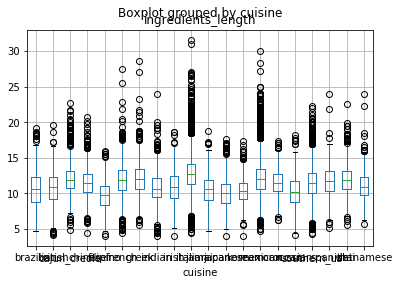

In [28]:
train.boxplot('ingredients_length',by='cuisine')

In [29]:
def make_features(df):
    df['num_ingredients'] = df['ingredients'].apply(len)
    df['ingredients_length'] =df['ingredients'].apply(lambda x: np.mean([len(item) for item in x]))
    return df

In [30]:
train = make_features(pd.read_json('train.json'))

In [31]:
train.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

   num_ingredients  ingredients_length  
0                9           12.000000  
1               11           10.090909  
2               12           10.333333  
3                4            6.750000  
4               20           10.100000

In [32]:
feature_cols = ['num_ingredients','ingredients_length']

In [33]:
feature_cols

['num_ingredients', 'ingredients_length']

In [34]:
X = train[feature_cols]
y = train.cuisine

In [35]:
X.shape

(39774, 2)

In [36]:
y.shape

(39774,)

In [37]:
y.values

array(['greek', 'southern_us', 'filipino', ..., 'irish', 'chinese',
       'mexican'], dtype=object)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=100)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state=1)

In [42]:
X_train.shape

(29830, 2)

In [43]:
X_test.shape

(9944, 2)

#### Train the model

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

#### Predict the model

In [45]:
y_pred_class = knn.predict(X_test)

#### Evaluate the model

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

   brazilian       0.00      0.00      0.00       110
     british       0.00      0.00      0.00       209
cajun_creole       0.00      0.00      0.00       373
     chinese       0.15      0.03      0.05       667
    filipino       0.18      0.06      0.09       188
      french       0.00      0.00      0.00       656
       greek       0.00      0.00      0.00       301
      indian       0.16      0.23      0.19       749
       irish       0.00      0.00      0.00       160
     italian       0.27      0.74      0.39      1981
    jamaican       0.00      0.00      0.00       150
    japanese       0.11      0.04      0.06       346
      korean       0.00      0.00      0.00       191
     mexican       0.18      0.24      0.21      1636
    moroccan       0.00      0.00      0.00       195
     russian       0.00      0.00      0.00       130
 southern_us       0.14      0.11      0.13      1065
     spanish       0.00    

C:\Users\rajam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn.cross_validation import cross_val_score

C:\Users\rajam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
cross_val_score(knn,X,y,cv=5,scoring='accuracy')

array([ 0.21791007,  0.21977884,  0.21719457,  0.21582191,  0.21303637])

In [50]:
cross_val_score(knn,X,y,cv=5,scoring='accuracy').mean()

0.21674835140081455

#### Null model

In [51]:
y_test.value_counts().head(1)

italian    1981
Name: cuisine, dtype: int64

In [52]:
y_test.value_counts().head(1) / y_test.shape

italian    0.199216
Name: cuisine, dtype: float64

#### sklearn dummy classifier

In [53]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')

In [54]:
dumb.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [55]:
y_pred_class = dumb.predict(X_test)

#### Read test data & make new features

In [56]:
new = pd.read_json('test.json')

In [57]:
new = make_features(pd.read_json('test.json'))

In [58]:
new.head()

id                                        ingredients  num_ingredients  \
0  18009  [baking powder, eggs, all-purpose flour, raisi...                6   
1  28583  [sugar, egg yolks, corn starch, cream of tarta...               11   
2  41580  [sausage links, fennel bulb, fronds, olive oil...                6   
3  29752  [meat cuts, file powder, smoked sausage, okra,...               21   
4  35687  [ground black pepper, salt, sausage casings, l...                8   

   ingredients_length  
0            9.333333  
1           10.272727  
2            9.666667  
3           12.000000  
4           13.000000

In [59]:
new.shape

(9944, 4)

In [60]:
X_new = new[feature_cols]

In [61]:
X_new.head()

num_ingredients  ingredients_length
0                6            9.333333
1               11           10.272727
2                6            9.666667
3               21           12.000000
4                8           13.000000

In [62]:
X.shape

(39774, 2)

In [63]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [64]:
new_pred_class_knn = knn.predict(X_new)

In [65]:
new_pred_class_knn

array(['mexican', 'southern_us', 'mexican', ..., 'italian', 'mexican',
       'mexican'], dtype=object)

In [66]:
new_pred_class_knn.shape

(9944,)

In [67]:
pd.DataFrame({'id':new.id,'cuisine':new_pred_class_knn})

cuisine     id
0         mexican  18009
1     southern_us  28583
2         mexican  41580
3         mexican  29752
4         italian  35687
5         mexican  38527
6     southern_us  19666
7         italian  41217
8         italian  28753
9          indian  22659
10        italian  21749
11        chinese  44967
12        italian  42969
13        italian  44883
14    southern_us  20827
15        mexican  23196
16        italian  35387
17    southern_us  33780
18        italian  19001
19        italian  16526
20         indian  42455
21    southern_us  47453
22        italian  42478
23        mexican  11885
24        italian  16585
25        mexican  29639
26         indian  26245
27        mexican  38516
28        italian  47520
29        italian  26212
...           ...    ...
9914       indian  49157
9915      italian  40847
9916      italian  14084
9917  southern_us   6802
9918      italian  22381
9919     japanese  21016
9920      italian  29024
9921      italian   4478
9922  southern_us  36711
9923      italian   8300
9924      mexican  47035
9925      italian  15596
9926      italian  19902
9927      italian  31242
9928       indian  21117
9929      mexican  15234
9930      italian  24993
9931       indian  31007
9932      mexican  31687
9933  southern_us  13657
9934      italian  36612
9935      italian  14008
9936      mexican  32124
9937      italian  43570
9938       indian  14059
9939      italian  30246
9940      italian  36028
9941      italian  22339
9942      mexican  42525
9943      mexican   1443

[9944 rows x 2 columns]

In [68]:
pd.DataFrame({'id':new.id,'cuisine':new_pred_class_knn}).set_index('id')

cuisine
id                
18009      mexican
28583  southern_us
41580      mexican
29752      mexican
35687      italian
38527      mexican
19666  southern_us
41217      italian
28753      italian
22659       indian
21749      italian
44967      chinese
42969      italian
44883      italian
20827  southern_us
23196      mexican
35387      italian
33780  southern_us
19001      italian
16526      italian
42455       indian
47453  southern_us
42478      italian
11885      mexican
16585      italian
29639      mexican
26245       indian
38516      mexican
47520      italian
26212      italian
...            ...
49157       indian
40847      italian
14084      italian
6802   southern_us
22381      italian
21016     japanese
29024      italian
4478       italian
36711  southern_us
8300       italian
47035      mexican
15596      italian
19902      italian
31242      italian
21117       indian
15234      mexican
24993      italian
31007       indian
31687      mexican
13657  southern_us
36612      italian
14008      italian
32124      mexican
43570      italian
14059       indian
30246      italian
36028      italian
22339      italian
42525      mexican
1443       mexican

[9944 rows x 1 columns]

In [69]:
pd.DataFrame({'id':new.id,'cuisine':new_pred_class_knn}).set_index('id').to_csv('sub1.csv')

#### Grid Search CV

In [70]:
knn = KNeighborsClassifier(n_neighbors=100)
cross_val_score(knn,X,y,cv=5,scoring='accuracy').mean()

0.21674835140081455

In [71]:
from sklearn.grid_search import GridSearchCV

C:\Users\rajam\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [72]:
#Searching optimal tuning parameter with GridSearchCV

In [73]:
param_grid = {}
param_grid['n_neighbors'] = [100,200]
param_grid

{'n_neighbors': [100, 200]}

In [74]:
param_grid = {'n_neighbors':[100,200]}

In [75]:
param_grid

{'n_neighbors': [100, 200]}

In [76]:
grid = GridSearchCV(knn,param_grid,cv=4,scoring='accuracy')

In [77]:
grid.fit(X,y)

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [100, 200]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [78]:
grid.grid_scores_

[mean: 0.21577, std: 0.00208, params: {'n_neighbors': 100},
 mean: 0.21853, std: 0.00072, params: {'n_neighbors': 200}]

In [79]:
# Pass new parameters to grid

In [80]:
param_grid = {}
param_grid['n_neighbors'] = list(range(200, 1001, 200))
param_grid

{'n_neighbors': [200, 400, 600, 800, 1000]}

In [81]:
grid = GridSearchCV(knn,param_grid,cv=4,scoring='accuracy')

In [82]:
%time grid.fit(X,y)

Wall time: 47.1 s


GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [83]:
grid.grid_scores_

[mean: 0.21853, std: 0.00072, params: {'n_neighbors': 200},
 mean: 0.21974, std: 0.00098, params: {'n_neighbors': 400},
 mean: 0.22125, std: 0.00098, params: {'n_neighbors': 600},
 mean: 0.22095, std: 0.00146, params: {'n_neighbors': 800},
 mean: 0.22155, std: 0.00195, params: {'n_neighbors': 1000}]

In [84]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
grid_mean_scores

[0.2185347211746367,
 0.21974153969930105,
 0.2212500628551315,
 0.2209483582239654,
 0.22155176748629757]

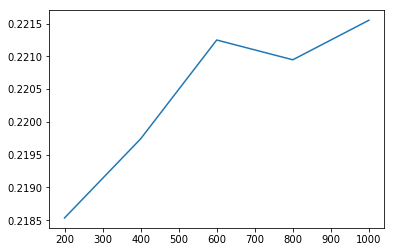

In [85]:
import matplotlib.pyplot as plt
plt.plot(list(range(200,1001,200)), grid_mean_scores)

In [86]:
grid.best_score_

0.22155176748629757

In [87]:
grid.best_params_

{'n_neighbors': 1000}

#### Try text as features

In [88]:
train.loc[0,'ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [89]:
type(train.ingredients)

pandas.core.series.Series

In [90]:
train.ingredients.astype(str)[0]

"['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']"

#### Update the feature function

In [91]:
def make_features(df):
    df['num_ingredients'] = df['ingredients'].apply(len)
    df['ingredients_length'] =df['ingredients'].apply(lambda x: np.mean([len(item) for item in x]))
    df['ingredients_str'] = df.ingredients.astype(str)
    return df

#### Add new string features to the dataframe

In [92]:
train = make_features(pd.read_json('train.json'))

In [93]:
train.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

   num_ingredients  ingredients_length  \
0                9           12.000000   
1               11           10.090909   
2               12           10.333333   
3                4            6.750000   
4               20           10.100000   

                                     ingredients_str  
0  ['romaine lettuce', 'black olives', 'grape tom...  
1  ['plain flour', 'ground pepper', 'salt', 'toma...  
2  ['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...  
3        ['water', 'vegetable oil', 'wheat', 'salt']  
4  ['black pepper', 'shallots', 'cornflour', 'cay...

In [94]:
train.loc[0,'ingredients_str']

"['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']"

In [95]:
X = train.ingredients_str
y = train.cuisine

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
vect = CountVectorizer()

In [98]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [99]:
X_dtm = vect.fit_transform(X)

In [100]:
X_dtm.shape

(39774, 3052)

In [102]:
print(vect.get_feature_names()[0:100])

['00', '10', '100', '14', '15', '25', '33', '40', '43', '95', '96', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent', 'accompaniment', 'achiote', 'acid', 'acini', 'ackee', 'acorn', 'acting', 'activ', 'active', 'added', 'adobo', 'adzuki', 'agar', 'agave', 'age', 'aged', 'ahi', 'ai', 'aioli', 'ajinomoto', 'ajwain', 'aka', 'alaskan', 'albacore', 'alcohol', 'ale', 'aleppo', 'alexia', 'alfalfa', 'alfredo', 'all', 'allspice', 'almond', 'almondmilk', 'almonds', 'aloe', 'alphabet', 'alum', 'amaranth', 'amarena', 'amaretti', 'amaretto', 'amba', 'amber', 'amberjack', 'amchur', 'america', 'american', 'aminos', 'ammonium', 'amontillado', 'ampalaya', 'an', 'anaheim', 'anasazi', 'ancho', 'anchovies', 'anchovy', 'and', 'andouille', 'anejo', 'angel', 'anglaise', 'angled', 'angostura', 'angus', 'anise', 'anisette', 'anjou', 'annatto', 'any', 'ao', 'aonori', 'apple', 'apples', 'applesauce', 'applewood', 'apricot', 'apricots', 'aquavit', 'arak', 'arame', 'arbol']


In [108]:
vect = CountVectorizer(token_pattern=r"'([a-z ]+)'")
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
        vocabulary=None)

In [110]:
X_dtm = vect.fit_transform(X)
print(vect.get_feature_names()[0:100])

['a taste of thai rice noodles', 'abalone', 'abbamele', 'absinthe', 'abura age', 'acai juice', 'accent', 'accent seasoning', 'accompaniment', 'achiote', 'achiote paste', 'achiote powder', 'acini di pepe', 'ackee', 'acorn squash', 'active dry yeast', 'adobo', 'adobo all purpose seasoning', 'adobo sauce', 'adobo seasoning', 'adobo style seasoning', 'adzuki beans', 'agar', 'agar agar flakes', 'agave nectar', 'agave tequila', 'aged balsamic vinegar', 'aged cheddar cheese', 'aged gouda', 'aged manchego cheese', 'ahi', 'ahi tuna steaks', 'aioli', 'ajinomoto', 'ajwain', 'aka miso', 'alaskan king crab legs', 'alaskan king salmon', 'albacore', 'albacore tuna in water', 'alcohol', 'ale', 'aleppo', 'aleppo pepper', 'alexia waffle fries', 'alfalfa sprouts', 'alfredo sauce', 'alfredo sauce mix', 'all beef hot dogs', 'all potato purpos', 'all purpose seasoning', 'all purpose unbleached flour', 'allspice', 'allspice berries', 'almond butter', 'almond extract', 'almond filling', 'almond flour', 'almon

In [111]:
X_dtm.shape

(39774, 6250)

In [112]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [113]:
cross_val_score(nb,X_dtm, y, cv=5, scoring='accuracy').mean()

0.73012671561980391

In [114]:
train.describe()

id  num_ingredients  ingredients_length
count  39774.000000     39774.000000        39774.000000
mean   24849.536959        10.767713           11.735962
std    14360.035505         4.428978            2.367371
min        0.000000         1.000000            4.000000
25%    12398.250000         8.000000           10.200000
50%    24887.000000        10.000000           11.625000
75%    37328.500000        13.000000           13.125000
max    49717.000000        65.000000           31.600000

#### Explain Pipeline methods

In [126]:
# just show how pipeline works
# pipeline - sequence of actions

In [115]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=1,strategy='median')

In [120]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(imp,knn)

In [121]:
pipe.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values=1, strategy='median', verbose=0)),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=100, p=2,
             weights='uniform'))]

In [122]:
#Another way to create pipeline - both are same

In [125]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('imputer',imp),('kneighborsclassifier',knn)])

In [127]:
pipe.fit(X_train,y_train)
y_pred_class = pipe.predict(X_test)


In [129]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

   brazilian       0.00      0.00      0.00       110
     british       0.00      0.00      0.00       209
cajun_creole       0.00      0.00      0.00       373
     chinese       0.13      0.03      0.04       667
    filipino       0.19      0.06      0.09       188
      french       0.07      0.00      0.01       656
       greek       0.00      0.00      0.00       301
      indian       0.16      0.23      0.19       749
       irish       0.00      0.00      0.00       160
     italian       0.27      0.72      0.39      1981
    jamaican       0.00      0.00      0.00       150
    japanese       0.07      0.02      0.04       346
      korean       0.00      0.00      0.00       191
     mexican       0.18      0.25      0.21      1636
    moroccan       0.00      0.00      0.00       195
     russian       0.00      0.00      0.00       130
 southern_us       0.14      0.12      0.13      1065
     spanish       0.00    

C:\Users\rajam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Use pipeline for proper cross validation

In [130]:
pipe = make_pipeline(vect,nb)

In [131]:
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
          vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [132]:
# Pass X instead of X_dtm to cross val score

In [133]:
X.head(3) # Series of string

0    ['romaine lettuce', 'black olives', 'grape tom...
1    ['plain flour', 'ground pepper', 'salt', 'toma...
2    ['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...
Name: ingredients_str, dtype: object

In [ ]:
# Passing a pipeline instead of a model object to cross val score

In [134]:
cross_val_score(pipe,X,y,cv=5, scoring='accuracy').mean()

0.73228849337901514

In [135]:
pipe.fit(X,y)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
        vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [136]:
new = make_features(pd.read_json('test.json'))

In [137]:
X_new = new.ingredients_str

In [138]:
new_pred_class_pipe = pipe.predict(X_new)

In [139]:
pd.DataFrame({'id':new.id,'cuisine':new_pred_class_pipe}).set_index('id').to_csv('sub2.csv')

In [140]:
print(new_pred_class_pipe)

['southern_us' 'southern_us' 'italian' ..., 'italian' 'southern_us'
 'mexican']
